In [370]:
import pandas as pd; import seaborn as sns; import matplotlib.pyplot as plt;
data = pd.read_csv('data.csv')

#there are 5000 shot_made_flag null values. Let's filter them out for the time being
#we could do nearest neighbors later to fix them
data = data.loc[data['shot_made_flag'].notnull()]

#feature engineering
data.seconds_remaining = pd.to_timedelta(data.seconds_remaining, unit='s')
data.minutes_remaining = pd.to_timedelta(data.minutes_remaining, unit='m')
data['time_remaining'] = data.minutes_remaining+data.seconds_remaining
data.game_date = pd.to_datetime(data.game_date)
data['home_game'] = data.matchup.apply(lambda x: 1 if 'vs.' in x else 0)
data.describe()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id,time_remaining,home_game
count,25697.000000,2.569700e+04,25697.000000,25697.000000,25697.000000,25697.000000,25697,25697.000000,25697.000000,25697,25697.000000,25697.000000,2.569700e+04,25697.000000,25697,25697.000000
mean,249.348679,2.474109e+07,33.953043,7.148422,91.257345,-118.262652,0 days 00:04:53.207767443,2.520800,0.146243,0 days 00:00:28.311553877,13.457096,0.446161,1.610613e+09,15328.166946,0 days 00:05:21.519321321,0.485854
std,149.778520,7.738108e+06,0.088152,110.073147,88.152106,0.110073,0 days 00:03:27.148523360,1.151626,0.353356,0 days 00:00:17.523391789,9.388725,0.497103,0.000000e+00,8860.462397,0 days 00:03:28.311076373,0.499810
min,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0 days 00:00:00,1.000000,0.000000,0 days 00:00:00,0.000000,0.000000,1.610613e+09,2.000000,0 days 00:00:00,0.000000
25%,111.000000,2.050006e+07,33.884300,-67.000000,4.000000,-118.336800,0 days 00:02:00,1.000000,0.000000,0 days 00:00:13,5.000000,0.000000,1.610613e+09,7646.000000,0 days 00:02:21,0.000000
50%,253.000000,2.090034e+07,33.970300,0.000000,74.000000,-118.269800,0 days 00:05:00,3.000000,0.000000,0 days 00:00:28,15.000000,0.000000,1.610613e+09,15336.000000,0 days 00:05:04,0.000000
75%,367.000000,2.960027e+07,34.040300,94.000000,160.000000,-118.175800,0 days 00:08:00,3.000000,0.000000,0 days 00:00:43,21.000000,1.000000,1.610613e+09,22976.000000,0 days 00:08:19,1.000000
max,653.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,0 days 00:11:00,7.000000,1.000000,0 days 00:00:59,79.000000,1.000000,1.610613e+09,30697.000000,0 days 00:11:54,1.000000


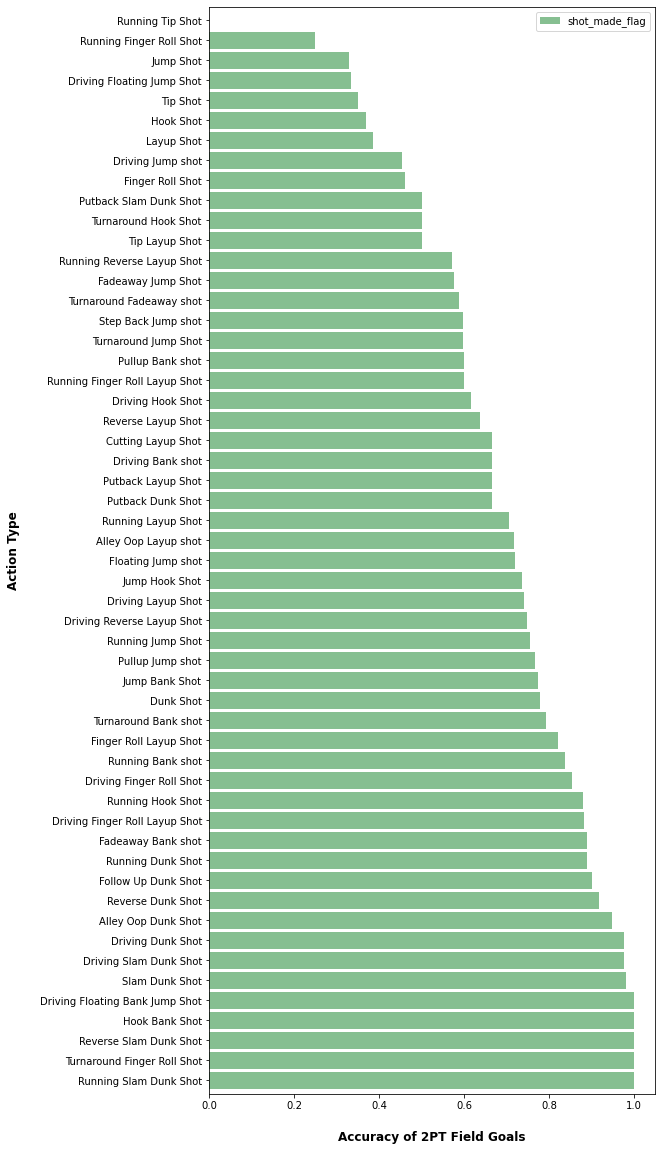

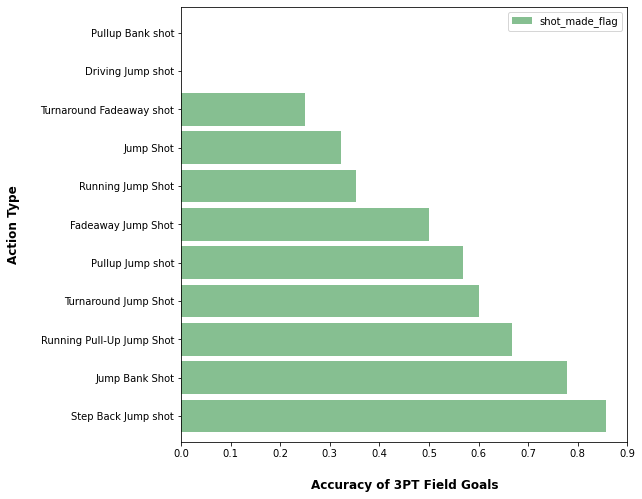

In [371]:
#action type accuracy
groups = data[['action_type','shot_type','shot_made_flag']].groupby(['action_type','shot_type'], as_index=False).mean()

parameters = {
    '2PT Field Goal': {
        'figsize': {
            'y': 20
        }
    },
    '3PT Field Goal': {
        'figsize': {
            'y': 8
        }
    }
}

#this plot might get merged into a single one
for n, g in groups.groupby('shot_type'):
    ax = g.sort_values(by='shot_made_flag', ascending=False).plot(kind='barh', x='action_type', y='shot_made_flag', figsize=(8, parameters[n]['figsize']['y']), color='#86bf91', zorder=2, width=0.85)
    # Set x-axis label
    ax.set_xlabel('Accuracy of ' + n + 's', labelpad=20, weight='bold', size=12)
    # Set y-axis label
    ax.set_ylabel('Action Type', labelpad=20, weight='bold', size=12);

In [372]:
#drawing the court
from matplotlib.patches import Circle, Rectangle, Arc; import numpy as np;

#source: http://savvastjortjoglou.com/nba-shot-sharts.html
def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax


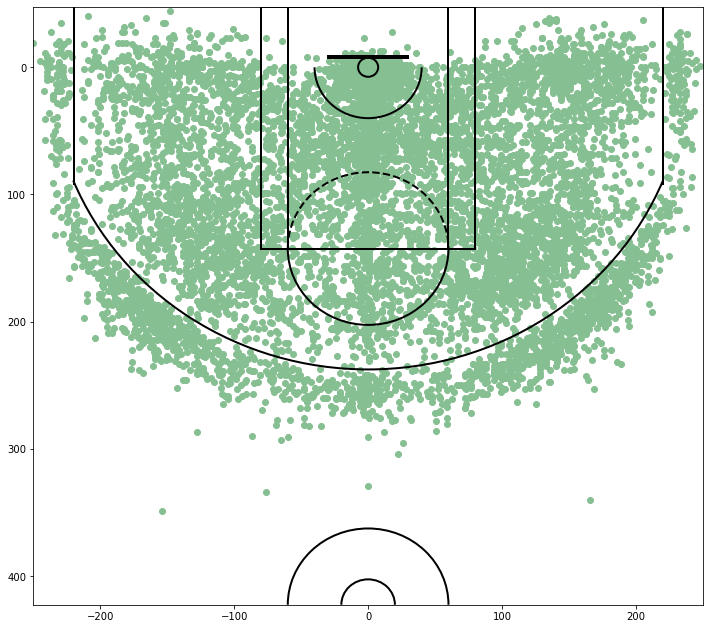

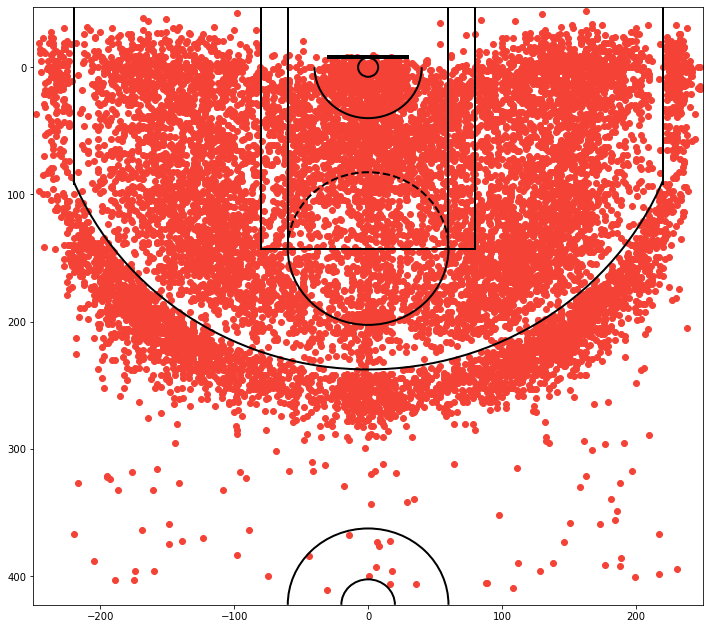

In [373]:
#shots made vs shots failed
parameters = [{
    'shot_made_flag': 1,
    'color': '#86bf91'
}, {
    'shot_made_flag': 0,
    'color': '#f44336'
}]

for x in range(2):
    plt.figure(figsize=(12,11))
    shots_made = data.loc[data['shot_made_flag'] == parameters[x]['shot_made_flag']]
    # plt.scatter(data.loc_x, data.loc_y, c=np.where((data['shot_made_flag'] == 1), 'g', 'r'))
    plt.scatter(shots_made.loc_x, shots_made.loc_y, color=parameters[x]['color'])
    draw_court()
    # Adjust plot limits to just fit in half court
    plt.xlim(-250,250)
    # Descending values along th y axis from bottom to top
    # in order to place the hoop by the top of plot
    plt.ylim(422.5, -47.5)
    # get rid of axis tick labels
    # plt.tick_params(labelbottom=False, labelleft=False)
    plt.show();

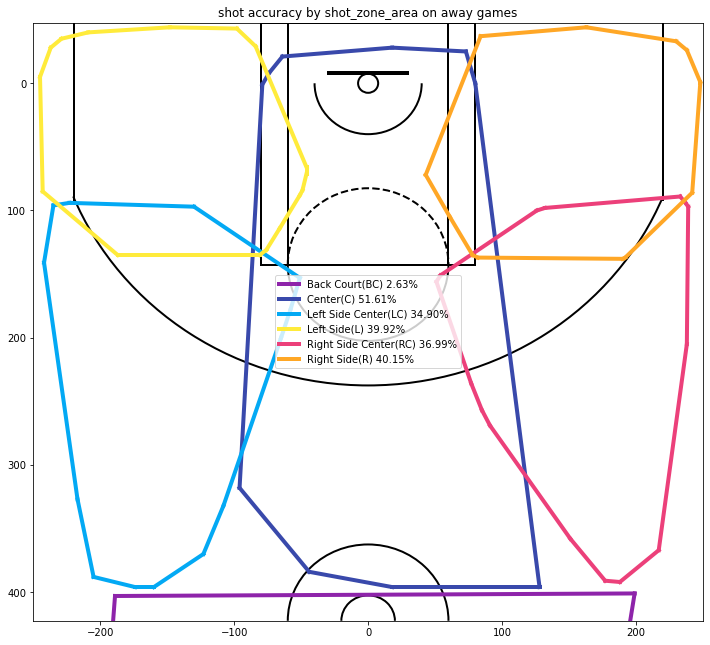

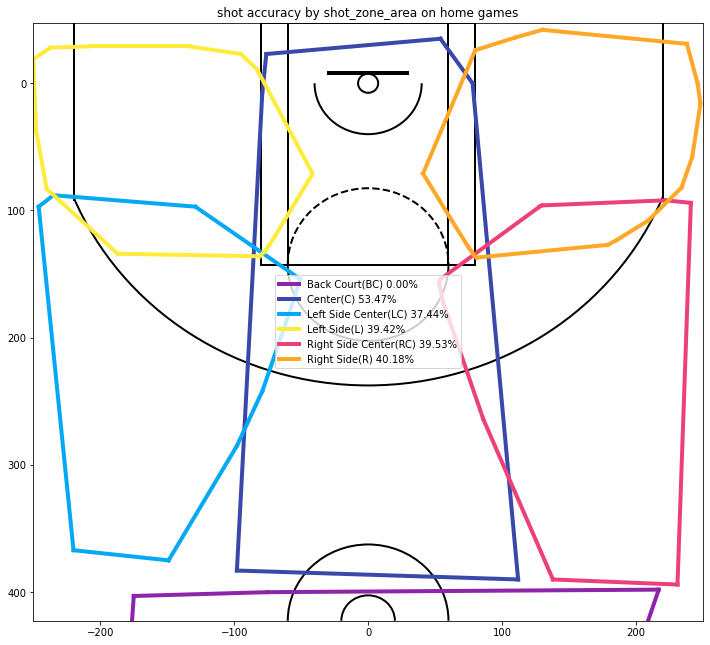

In [374]:
#shot accuracy by home or away games
from scipy.spatial import ConvexHull, convex_hull_plot_2d; from matplotlib.lines import Line2D;

colors = {
    'Back Court(BC)': '#8e24aa', #purple
    'Center(C)': '#3949ab', #indigo
    'Left Side Center(LC)': '#03a9f4', #light blue
    'Left Side(L)': '#ffeb3b', #yellow
    'Right Side Center(RC)': '#ec407a', #pink
    'Right Side(R)': '#ffa726' #orange
}

home_or_away_str = ['away', 'home']

for n, g in data.groupby(['home_game'], as_index=False):
    sub_data = g[['shot_zone_area', 'loc_x','loc_y', 'shot_made_flag']]
    hulls = []
    legends = []
    for n2, g2 in sub_data.groupby('shot_zone_area', as_index=False):
        points = g2[['loc_x','loc_y']].to_numpy()
        hulls.append({ 
            'name': n2, 
            'points': points,
            'hull': None if points.size < 3 else ConvexHull(points)
        })
        legends.append(Line2D([0], [0], color=colors[n2], lw=4, label=n2 + ' ' + '{:.2%}'.format(g2['shot_made_flag'].mean())))
    plt.figure(figsize=(12,11))
    ax = draw_court()
    for hull in hulls:
        # plt.text(hull['centroid'][0], hull['centroid'][1], hull['accuracy'], fontsize=12)
        if hull['hull'] is not None:
            for simplex in hull['hull'].simplices:
                plt.plot(hull['points'][simplex, 0], hull['points'][simplex, 1], 'k-', color=colors[hull['name']], linewidth=4)

    ax.legend(handles=legends, loc='center')
        

    plt.xlim(-250,250)
    # # Descending values along th y axis from bottom to top
    # # in order to place the hoop by the top of plot
    plt.ylim(422.5, -47.5)
    # # get rid of axis tick labels
    # # plt.tick_params(labelbottom=False, labelleft=False)
    plt.title('shot accuracy by shot_zone_area on ' + home_or_away_str[n] + ' games')
    plt.show();